# Tutorial for one-photon imaging dataset.

This tutorial shows how to access the *Two Photon dataset* using `pynwb`. 

This dataset contains the 2-photon calcium imaging holographic stimulation data and visual stimuli events.

Contents:

- [Reading an NWB file](#read-nwb)
- [Access subject and task metadata](#access-subject)
- [Access Imaging](#access-imaging)
- [Access TTL Signals](#ttl-signals)
- [Access Wheel Signal](#wheel-signal)
- [Access Raw Behavior](#raw-behavior)
- [Access Processed Behavior](#processed-behavior)
- [Access Visual Stimulus](#access-visualstim)

A schematic representation where the source data is saved in NWB:

![Alt text](./conversion_outline_diagram.png)

# Reading an NWB file <a name="read-nwb"></a>

This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.


In [3]:
from pynwb import NWBHDF5IO
from pathlib import Path

# Choose which epoch to explore
session_id = '11222019_grabAM06_vis_stim'

# The file path to a .nwb file
root_path = Path("/media/amtra/Samsung_T5/CN_data")
output_dir_path = root_path / "Higley-conversion_nwb/nwb_stub/"
nwbfile_path = output_dir_path / f"{session_id}.nwb"
io = NWBHDF5IO(path=nwbfile_path, mode="r", load_namespaces=True)
nwbfile = io.read()

nwbfile

/home/amtra/.local/lib/python3.9/site-packages/pynwb/image.py:106: UserWarning: ImageSeries 'Video: 11222019_grabAM06_visual_stim': Length of data does not match length of timestamps. Your data may be transposed. Time should be on the 0th dimension
  warnings.warn(


root pynwb.file.NWBFile at 0x139782801740608
Fields:
  acquisition: {
    OnePhotonSeriesBlueExcitationGreenChannel <class 'pynwb.ophys.OnePhotonSeries'>,
    OnePhotonSeriesBlueExcitationRedChannel <class 'pynwb.ophys.OnePhotonSeries'>,
    OnePhotonSeriesGreenExcitationGreenChannel <class 'pynwb.ophys.OnePhotonSeries'>,
    OnePhotonSeriesGreenExcitationRedChannel <class 'pynwb.ophys.OnePhotonSeries'>,
    OnePhotonSeriesVioletExcitationGreenChannel <class 'pynwb.ophys.OnePhotonSeries'>,
    OnePhotonSeriesVioletExcitationRedChannel <class 'pynwb.ophys.OnePhotonSeries'>,
    TTLTypesTable <class 'abc.TtlTypesTable'>,
    TTLsTable <class 'abc.TtlsTable'>,
    Video: 11222019_grabAM06_visual_stim <class 'pynwb.image.ImageSeries'>,
    WheelSignal <class 'pynwb.base.TimeSeries'>
  }
  devices: {
    CustomMicroscope <class 'pynwb.device.Device'>
  }
  experimenter: ['Last, First Middle']
  file_create_date: [datetime.datetime(2024, 4, 22, 12, 38, 11, 531742, tzinfo=tzoffset(None, 7200))]
  identifier: e544a31f-e709-4411-adf1-98130e417964
  imaging_planes: {
    ImagingPlaneBlueExcitationGreenChannel <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlaneBlueExcitationRedChannel <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlaneGreenExcitationGreenChannel <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlaneGreenExcitationRedChannel <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlaneVioletExcitationGreenChannel <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlaneVioletExcitationRedChannel <class 'pynwb.ophys.ImagingPlane'>
  }
  institution: Institution where the lab is located
  intervals: {
    VisualStimulus <class 'pynwb.epoch.TimeIntervals'>
  }
  lab: Higley
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>
  }
  session_description: A rich text description of the experiment. Can also just be the abstract of the publication.
  session_id: 11222019_grabAM06_vis_stim
  session_start_time: 2019-11-23 00:11:40-05:00
  subject: subject pynwb.file.Subject at 0x139781432334848
Fields:
  age: P1W2D
  age__reference: birth
  sex: U
  species: Rattus norvegicus
  subject_id: grabAM06

  timestamps_reference_time: 2019-11-23 00:11:40-05:00

Importantly, the `session start time` is the reference time for all timestamps in the file. For instance, an event with a timestamp of 0 in the file means the event occurred exactly at the session start time.

The `session_start_time` is extracted from the ScanImage metadata (`epoch`) of the first .tiff of the epoch.

In [4]:
nwbfile.session_start_time

datetime.datetime(2019, 11, 23, 0, 11, 40, tzinfo=tzoffset(None, -18000))

# Access subject metadata <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.


In [5]:
nwbfile.subject

subject pynwb.file.Subject at 0x139781432334848
Fields:
  age: P1W2D
  age__reference: birth
  sex: U
  species: Rattus norvegicus
  subject_id: grabAM06

# Access OnePhoton Imaging <a name="access-imaging"></a>

This section demonstraces how to access the raw Two Photon imaging data.

`NWB` organizes data into different groups depending on the type of data. Groups can be thought of as folders within the file. Here are some of the groups within an NWBFile and the types of data they are intended to store:

- `acquisition`: raw, acquired data that should never change
- `processing`: processed data, typically the results of preprocessing algorithms and could change

## Raw OnePhoton Imaging

The raw TwoPhoton imaging data is stored in `pynwb.ophys.OnePhotonSeries` objects (for each channel and excitation type separately) which is added to `nwbfile.acquisition`. The data can be accessed as `nwbfile.acquisition['OnePhotonSeries_color_Excitation_color_Channel']`.

The data in [OnePhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.OnePhotonSeries) is stored as a three dimensional array: the first dimension is time (frame), the second and third dimensions represent x and y (width by height). 

In [7]:
names_of_photon_series = nwbfile.acquisition.keys()
_ = [print(name) for name in names_of_photon_series if "OnePhotonSeries" in name ]

OnePhotonSeriesBlueExcitationGreenChannel
OnePhotonSeriesBlueExcitationRedChannel
OnePhotonSeriesGreenExcitationGreenChannel
OnePhotonSeriesGreenExcitationRedChannel
OnePhotonSeriesVioletExcitationGreenChannel
OnePhotonSeriesVioletExcitationRedChannel


In [8]:
excitation_channel_combination = "BlueExcitationGreenChannel"

In [9]:
photon_series = nwbfile.acquisition[f"OnePhotonSeries{excitation_channel_combination}"]

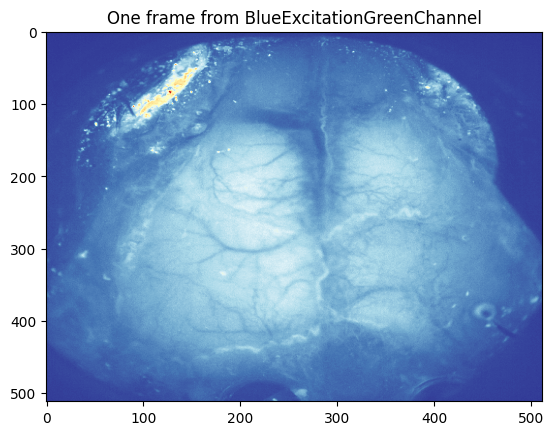

In [14]:
# Visualize the imaging data.

from matplotlib import pyplot as plt

plt.imshow(photon_series.data[10], aspect="auto", cmap="RdYlBu_r")
plt.title(f"One frame from {excitation_channel_combination}")
plt.show()


In [15]:
photon_series.rate

10.000000000000036

In [16]:
photon_series.starting_time

10.0512

# Access TTL Signals <a name="#ttl-signals"></a>

This section demonstrates how to access the TTL signals stored in the NWBFile.
TTLTypesTable contains the description and the id for each TTL signal
TTLsTable contains the respective timestamps (rising times)

In [17]:
nwbfile.acquisition["TTLTypesTable"]

TTLTypesTable abc.TtlTypesTable at 0x139781440425120
Fields:
  colnames: ['event_name' 'event_type_description' 'pulse_value']
  columns: (
    event_name <class 'hdmf.common.table.VectorData'>,
    event_type_description <class 'hdmf.common.table.VectorData'>,
    pulse_value <class 'hdmf.common.table.VectorData'>
  )
  description: Contains the type of TTL signals from Spike2 output.
  id: id <class 'hdmf.common.table.ElementIdentifiers'>

In [20]:
nwbfile.acquisition["TTLsTable"]


TTLsTable abc.TtlsTable at 0x139781440303216
Fields:
  colnames: ['timestamp' 'ttl_type']
  columns: (
    timestamp <class 'abc.TimestampVectorData'>,
    ttl_type <class 'hdmf.common.table.DynamicTableRegion'>
  )
  description: Contains the TTL signals onset times.
  id: id <class 'hdmf.common.table.ElementIdentifiers'>

# Access Wheel Signal <a name="#wheel-signal"></a>

This section demonstrates how to access the wheel velocity trace stored in the NWBFile.

In [27]:
wheel_signal = nwbfile.acquisition["WheelSignal"]
wheel_signal

WheelSignal pynwb.base.TimeSeries at 0x139781432135008
Fields:
  comments: no comments
  conversion: 0.000152587890625
  data: <HDF5 dataset "data": shape (100, 1), type "<i2">
  description: The WheelSignal measured over time.
  offset: 0.0
  rate: 5000.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: Volts

Text(0.5, 1.0, 'WheelSignal')

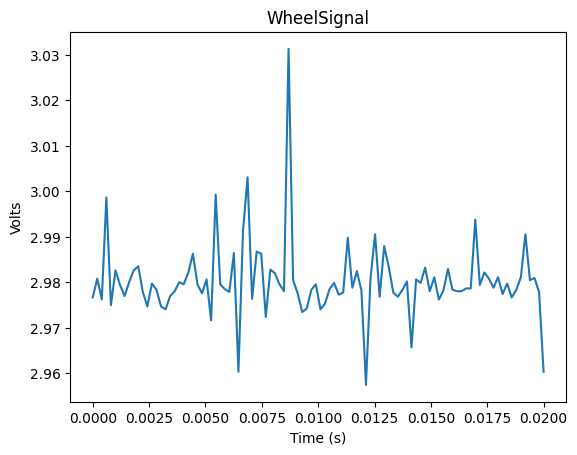

In [33]:
import numpy as np
time = np.linspace(0, wheel_signal.data.shape[0]/wheel_signal.rate,wheel_signal.data.shape[0])
plt.plot(time,wheel_signal.data*wheel_signal.conversion)
plt.ylabel(wheel_signal.unit)
plt.xlabel("Time (s)")
plt.title(wheel_signal.name)

# Access Raw Behavior <a name="#raw-behavior"></a>

This section demonstrates how to access the raw behavioral video stored in the NWBFile.

In [34]:
video = nwbfile.acquisition["Video: 11222019_grabAM06_visual_stim"]
video

Video: 11222019_grabAM06_visual_stim pynwb.image.ImageSeries at 0x139781440423104
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (10, 1182, 1152, 3), type "|u1">
  description: Video recorded by camera.
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (21506,), type "<f8">
  timestamps_unit: seconds
  unit: Frames

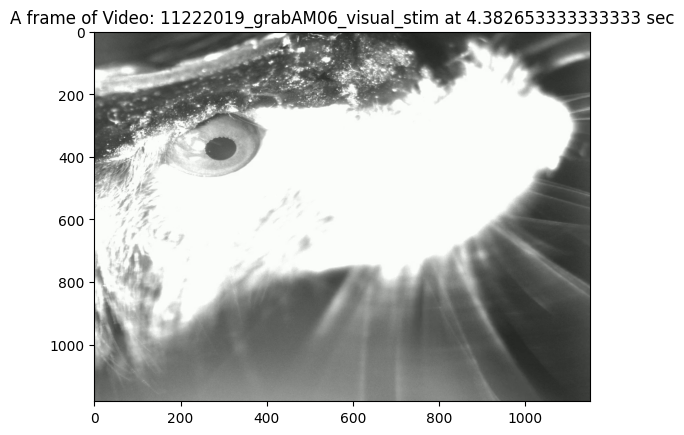

In [40]:
plt.imshow(video.data[1], aspect="auto")
plt.title(f"A frame of {video.name} at {video.timestamps[1]} sec")
plt.show()

# Access Processed Behavior <a name="#processed-behavior"></a>

This section demonstrates how to access the Facemap output stored in the NWBFile.


In [41]:
nwbfile.processing["behavior"]["EyeTracking"]

EyeTracking pynwb.behavior.EyeTracking at 0x139781430524416
Fields:
  spatial_series: {
    eye_center_of_mass <class 'pynwb.behavior.SpatialSeries'>
  }

In [42]:
nwbfile.processing["behavior"]["PupilTracking"]

PupilTracking pynwb.behavior.PupilTracking at 0x139781431363184
Fields:
  time_series: {
    pupil_area <class 'pynwb.base.TimeSeries'>,
    pupil_area_raw <class 'pynwb.base.TimeSeries'>
  }

In [44]:
motion_svd_series = nwbfile.processing["behavior"]["MotionSVDSeriesROI1"]
motion_svd_series

MotionSVDSeriesROI1 abc.MotionSVDSeries at 0x139781432333456
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (21506, 500), type "<f4">
  description: SVD components for ROI1
  interval: 1
  motion_masks: motion_masks <class 'hdmf.common.table.DynamicTableRegion'>
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (21506,), type "<f8">
  timestamps_unit: seconds
  unit: unknown

In [45]:
motion_svd_series.data.shape

(21506, 500)

In [46]:
motion_svd_masks = nwbfile.processing["behavior"]["MotionSVDMasksROI1"]
motion_svd_masks

MotionSVDMasksROI1 abc.MotionSVDMasks at 0x139781432333840
Fields:
  colnames: ['image_mask']
  columns: (
    image_mask_index <class 'hdmf.common.table.VectorIndex'>,
    image_mask <class 'hdmf.common.table.VectorData'>
  )
  description: motion mask for ROI1
  downsampling_factor: 4.0
  id: id <class 'hdmf.common.table.ElementIdentifiers'>
  mask_coordinates: <HDF5 dataset "mask_coordinates": shape (4,), type "<i8">
  processed_frame_dimension: <HDF5 dataset "processed_frame_dimension": shape (2,), type "<i8">

In [48]:
motion_svd_masks.mask_coordinates[:]

array([ 92, 131, 208, 275])

In [49]:
motion_svd_masks.processed_frame_dimension[:]

array([295, 288])

# Access Visual Stimulus <a name="access-visualstim"></a>

This section demonstrates how to access the visual stimulus data.

In [21]:
nwbfile.intervals["VisualStimulus"]

VisualStimulus pynwb.epoch.TimeIntervals at 0x139781436606496
Fields:
  colnames: ['start_time' 'stop_time']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>
  )
  description: Intervals for each VisualStimulus
  id: id <class 'hdmf.common.table.ElementIdentifiers'>